## Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Libraries for Image 

In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

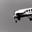

In [3]:
PIL.Image.open('real-and-ai/train/FAKE/5999.jpg')


In [4]:
image = cv2.imread('real-and-ai/train/FAKE/5999.jpg')
image.shape

(32, 32, 3)

In [5]:
train_path = 'real-and-ai/train'
test_path = 'real-and-ai/test'

## Defining a funciton to get input and output arrays 

In [6]:

def get_X_and_y(path):

    X = []
    y = []

    fake_path = os.path.join(path, 'FAKE')
    real_path = os.path.join(path, 'REAL')

    print("No.of FAKE images present : ", len(os.listdir(fake_path)))
    print("No.of REAL images present : ", len(os.listdir(real_path)))

    for file in os.listdir(fake_path):
        img_path = os.path.join(fake_path, file)
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (32,32)) /255
        X.append(resized)
        y.append(0)

    for file in os.listdir(real_path):
        img_path = os.path.join(real_path, file)
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (32,32)) / 255
        X.append(resized)
        y.append(1)

    X = np.array(X)
    y = np.array(y)
    print("No.of images present in X : ", len(X))

    return X, y


### Extracting X_train and y_train for training

In [7]:
X_train , y_train = get_X_and_y(train_path)

No.of FAKE images present :  50000
No.of REAL images present :  50000
No.of images present in X :  100000


### Extracting X_test and y_test for testing

In [8]:
X_test , y_test = get_X_and_y(test_path)

No.of FAKE images present :  10000
No.of REAL images present :  10000
No.of images present in X :  20000


#### Checking the shape of each image

In [9]:
X_train[0].shape, y_train[0]

((32, 32, 3), 0)

## Designing a model for prediction

#### Importing **"keras"** for CNN

In [10]:
import keras
import tensorflow as tf
from tensorflow.keras import models , layers

In [11]:

model = models.Sequential([
    layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(2,activation = 'sigmoid'),
                         ])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model.fit(X_train,y_train, epochs = 5)


c:\Users\klick\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.7756 - loss: 0.4629
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - accuracy: 0.8768 - loss: 0.2954
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.9019 - loss: 0.2398
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.9125 - loss: 0.2149
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9198 - loss: 0.1986


In [12]:
model.evaluate(X_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8665 - loss: 0.3428


[0.24410440027713776, 0.9058499932289124]

In [13]:
y_pred_prob  = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


In [14]:
y_pred_prob[:5]

array([[0.97601753, 0.00336864],
       [0.7860706 , 0.02824762],
       [0.7886015 , 0.01617265],
       [0.8903489 , 0.02447804],
       [0.91992354, 0.01357887]], dtype=float32)

In [15]:
y_pred = [np.argmax(i) for i in y_pred_prob]
y_pred[:5]

[0, 0, 0, 0, 0]

## Classification Report

In [16]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.96      0.85      0.90     10000
           1       0.86      0.96      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



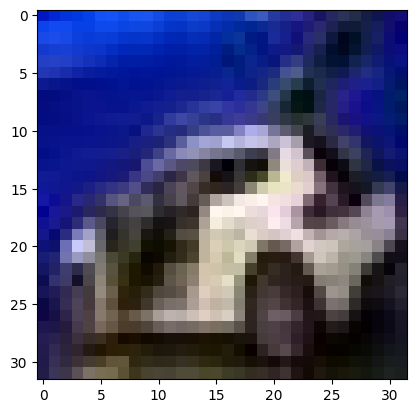

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Real Image


In [17]:
# write a function to check the model on any image and print the result as if 0 then fake else real

def check_image(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img,(32,32))
    img = img/255
    img = np.expand_dims(img,axis = 0)
    if np.argmax(model.predict(img)) == 0:
        print('Fake Image')
    else:
        print('Real Image')

check_image('real-and-ai/test/REAL/0000 (2).jpg')



## Confusion Matrix 

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

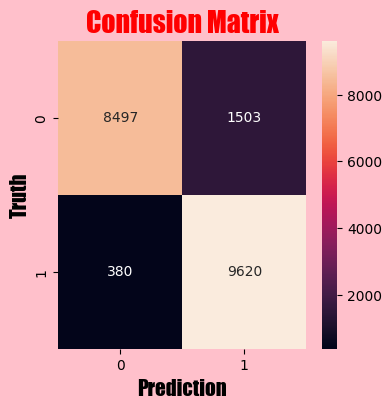

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(4,4), facecolor= 'pink', edgecolor='brown')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'black','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'black','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'red','size':20})
plt.show()

## **THANK YOU !**

In [20]:
tf.keras.models.save_model(model,'model.hdf5')

In [21]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import cv2

file_upload = st.file_uploader("Upload File", type=["jpg", "png"], accept_multiple_files=True)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('model.hdf5')
    return model

model = load_model()
st.write("""
            # Fake Image Detection
            """
            )

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

import cv2

from PIL import Image, ImageOps
import numpy as np


def import_and_predict(image_data, model):

        size = (32,32)
        image = ImageOps.fit(image_data, size, Image.LANCZOS)
        img = np.asarray(image)/255.0
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names = ['Fake','Real']
    string = "This image most likely is: "+class_names[np.argmax(predictions)]
    st.success(string)
    

Overwriting app.py


In [22]:
!ngrok authtoken 2U0hFvQ28II7dyU9SFTTZxInGM7_5f7zFKc7upWfW7HFEqwU7

                                                                                                    
Installing ngrok ... 
                                                                                                    


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\klick\AppData\Local\Programs\Python\Python311\Scripts\ngrok.exe\__main__.py", line 7, in <module>
  File "C:\Users\klick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyngrok\ngrok.py", line 567, in main
    run(sys.argv[1:])
  File "C:\Users\klick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyngrok\ngrok.py", line 555, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "C:\Users\klick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyngrok\process.py", line 275, in run_process
    subprocess.call(start)
  File "C:\Users\klick\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 389, in call
    with Popen(*popenargs, **kwargs) as p:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\klick\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in

In [23]:
!streamlit run app.py 


^C


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port = 4041)
url

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)